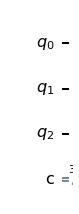

In [10]:
from qiskit import *

circuit = QuantumCircuit(3, 3)
circuit.draw(output='mpl')
# print(circuit.draw())


In [11]:
circuit.x(0)
circuit.barrier()
print(circuit.draw())

     ┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════
             


In [12]:
circuit.h(1)
circuit.cx(1, 2)
print(circuit.draw())

     ┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════
                       


In [13]:
circuit.cx(0, 1)
circuit.h(0)
print(circuit.draw())

     ┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════
                                 


In [14]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
print(circuit.draw())

     ┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1 


In [16]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
print(circuit.draw())

     ┌───┐ ░                ┌───┐ ░ ┌─┐    ░          ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■──░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │  ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼──░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │  ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘    ░ └───┘   
c: 3/════════════════════════════════╩══╩═══════════════════════
                                     0  1                       


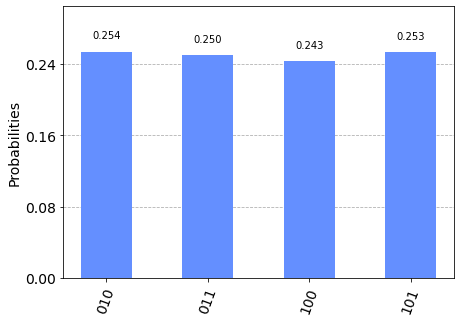

In [19]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)